<a href="https://colab.research.google.com/github/SachinScaler/Feb25-Maths-for-ML/blob/main/Linear_Algebra_4_Loss_minimization_in_classification%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# creating a binary dataset
x, y = datasets.make_blobs(n_samples=200,
                   n_features=2,
                   centers=[[2,2],[10,10]],
                   center_box=(0,10),
                   cluster_std=3)

set(y)

{0, 1}

In [ ]:
y[y==0]=-1
set(y)

{-1, 1}

In [ ]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val= (-w[0]*x_val-w0)/w[1] # creating a line

    # plotting the line
    plt.plot(x_val,y_val)

    # plotting the points
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()


In [ ]:
w = np.random.normal(size=(2,)) # [1,1]
w0 = np.random.normal()
print(w)
print(w0)

[1.34253193 0.60053116]
0.9880208047747411


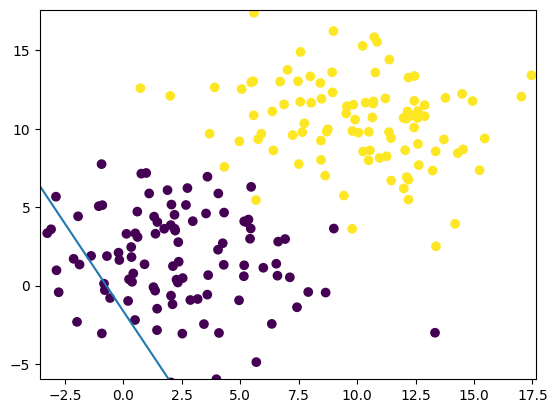

In [ ]:
show(w,w0,x,y)

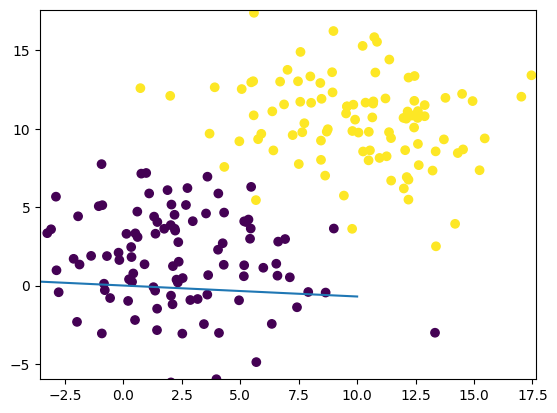

In [ ]:
w = w + np.array([2,10])
w0 = w0 + 1

show(w,w0,x,y)

In [ ]:
# compute distance for SOD
def dist_from_hyperplane(w,w0,x):
    d = (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d


### Perceptron Implementation for next class

In [ ]:
print(w)
print(w0)

[-0.65746807 -9.39946884]
-0.01197919522525881


In [ ]:
x[10]

array([ 2.03346453, -6.17956063])

## Try adding and subtracting x_vectors and to w and visualize

Weights are W1 : 23.003356061796726, W2 : 36.120600026323324, W0 : -340.01197919522525
Accuarcy:  99.0 %


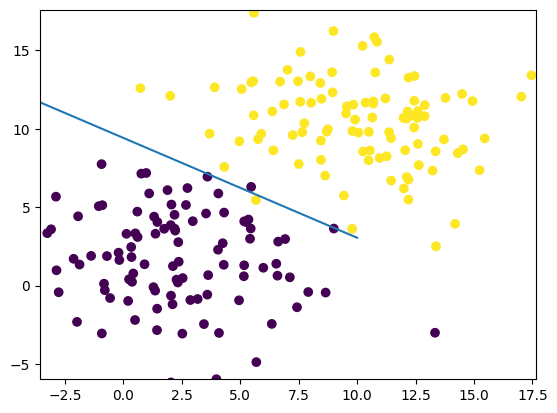

Weights are W1 : 23.208466124508124, W2 : 35.276407206156456, W0 : -340.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 23.413576187219522, W2 : 34.43221438598959, W0 : -340.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 23.61868624993092, W2 : 33.58802156582272, W0 : -340.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 23.82379631264232, W2 : 32.743828745655854, W0 : -340.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 26.329005646894814, W2 : 33.352807685769825, W0 : -340.01197919522525
Accuarcy:  98.0 %
Weights are W1 : 26.96504120809721, W2 : 34.61110425443237, W0 : -340.01197919522525
Accuarcy:  98.0 %
Weights are W1 : 18.167521581018498, W2 : 30.13275426356248, W0 : -341.01197919522525
Accuarcy:  98.5 %
Weights are W1 : 24.268593230376695, W2 : 37.682348390502575, W0 : -340.01197919522525
Accuarcy:  98.5 %
Weights are W1 : 16.192336657189042, W2 : 33.82832508628392, W0 : -341.01197919522525
Accuarcy:  97.5 %
Weights are W1 : 23.0146713604383, W2 : 42.00224589987525, W0 :

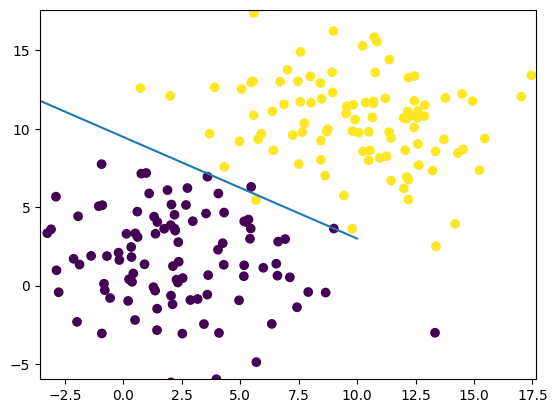

Weights are W1 : 25.09947701142735, W2 : 37.59002380442235, W0 : -364.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 25.304587074138748, W2 : 36.745830984255484, W0 : -364.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 25.509697136850146, W2 : 35.90163816408862, W0 : -364.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 25.714807199561545, W2 : 35.05744534392175, W0 : -364.01197919522525
Accuarcy:  99.0 %
Weights are W1 : 28.22001653381404, W2 : 35.66642428403572, W0 : -364.01197919522525
Accuarcy:  98.0 %
Weights are W1 : 28.856052095016437, W2 : 36.924720852698265, W0 : -364.01197919522525
Accuarcy:  98.0 %
Weights are W1 : 20.058532467937724, W2 : 32.44637086182837, W0 : -365.01197919522525
Accuarcy:  98.5 %
Weights are W1 : 26.15960411729592, W2 : 39.99596498876846, W0 : -364.01197919522525
Accuarcy:  98.5 %
Weights are W1 : 18.083347544108268, W2 : 36.14194168454981, W0 : -365.01197919522525
Accuarcy:  97.5 %
Weights are W1 : 15.47212705907641, W2 : 38.579215938608705, W0 :

In [ ]:
# training function

def perceptron_algorithm(x, y, w, w0, num_iter=100, threshold=90):
    best_acc = 0
    for i in range(num_iter):
        misclassified_points = 0
        for (xi,yi) in zip(x,y):
            d_sign = np.sign(dist_from_hyperplane(w, w0, xi))
            sign_y = np.sign(yi)

            if d_sign != sign_y: # update step
                w = w + yi*xi
                w0 = w0 + yi
                misclassified_points += 1
        print(f"Weights are W1 : {w[0]}, W2 : {w[1]}, W0 : {w0}")
        total = len(y) # x.shape[0]
        accuracy = (1 - misclassified_points/total) * 100
        print(f"Accuarcy:  {accuracy} %")
        if best_acc < accuracy:
            show(w,w0,x,y)
            best_acc = accuracy
            final_w = w
            final_w0 = w0

        if accuracy==threshold:
            return w,w0
        if misclassified_points == 0:
            return w,w0
    print(f"Best Accuracy: {best_acc}")

    return final_w, final_w0

w, w0 = perceptron_algorithm(x, y, w, w0, num_iter=1000, threshold = 100)

In [ ]:
# return w and wo which give the best accuracy?